<a href="https://colab.research.google.com/github/ProteintechLab/Statistics/blob/main/ELISA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(tidyverse)
library(readxl)

#Load the packages

In [ ]:
%%R
install.packages("cowplot")

#Install cowplot

In [ ]:
%%R
download.file("https://raw.githubusercontent.com/ProteintechLab/Statistics/main/TNF_ELISA.xlsx","TNF_ELISA.xlsx")

#Download the files

#Plotting the standard curve

In [ ]:
%%R
TNFdata<-read_excel("TNF_ELISA.xlsx", range = "A1:I9")

#Example to import the data and select the range of cells from the excel sheet

In [ ]:
%%R
TNFdata

#Print the table

# A tibble: 8 × 9
  Row     `1`   `2`   `3`   `4`   `5`   `6`    `7`    `8`
  <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>  <dbl>  <dbl>
1 A     1.84  1.84  0.054 0.052 0.061 0.059 0.0565 0.0543
2 B     1.24  1.29  0.053 0.055 0.07  0.061 0.0588 0.0585
3 C     0.757 0.735 1.83  1.84  1.98  1.98  1.91   1.90  
4 D     0.427 0.456 0.074 0.075 0.065 0.063 0.65   0.067 
5 E     0.251 0.238 0.069 0.071 0.063 0.062 0.65   0.066 
6 F     0.145 0.142 1.39  1.39  1.57  1.56  1.49   1.49  
7 G     0.096 0.089 0     0     0     0     0      0     
8 H     0.049 0.041 0     0     0     0     0      0     


In [ ]:
%%R
plate_plan<-read_excel("TNF_ELISA.xlsx", range = "A12:I20")

#From the same excel file we have added the plate plan

In [ ]:
%%R
plate_plan

#Here is the metadata for the experiment and the curve values

# A tibble: 8 × 9
  Row   Standard_1 Standard_2 Exp_1_r1 Exp_1_r2 Exp_2_r1 Exp_2_r2 Exp_3_r1
  <chr>      <dbl>      <dbl> <chr>    <chr>    <chr>    <chr>    <chr>   
1 A         1000       1000   24hr M0  24hr M0  24hr M0  24hr M0  24hr M0 
2 B          500        500   24hr M2  24hr M2  24hr M2  24hr M2  24hr M2 
3 C          250        250   24hr M1  24hr M1  24hr M1  24hr M1  24hr M1 
4 D          125        125   48hr M0  48hr M0  48hr M0  48hr M0  48hr M0 
5 E           62.5       62.5 48hr M2  48hr M2  48hr M2  48hr M2  48hr M2 
6 F           31.2       31.2 48hr M1  48hr M1  48hr M1  48hr M1  48hr M1 
7 G           15.6       15.6 <NA>     <NA>     <NA>     <NA>     <NA>    
8 H            0          0   <NA>     <NA>     <NA>     <NA>     <NA>    
# ℹ 1 more variable: Exp_3_r2 <chr>


In [ ]:
%%R
TNF_standards<-plate_plan[,c(1:2)]
TNF_standard_values<-TNFdata[,c(1:3)]

#Select columns 1 and 2 from the plan and the data, we are selecting the columns using [,]. If we have values [1,], we would select rows and [,1] colmns.
#row or column 1. In the code above we are collecting column 1-2 and 1-3.


In [ ]:
%%R
standards<-TNF_standards%>%left_join(TNF_standard_values, by = "Row")

#Now we join them together, using the row values for the plate A, B,C....

In [ ]:
%%R
standards

#Print the standard data (background corrected)

# A tibble: 8 × 4
  Row   Standard_1   `1`   `2`
  <chr>      <dbl> <dbl> <dbl>
1 A         1000   1.84  1.84 
2 B          500   1.24  1.29 
3 C          250   0.757 0.735
4 D          125   0.427 0.456
5 E           62.5 0.251 0.238
6 F           31.2 0.145 0.142
7 G           15.6 0.096 0.089
8 H            0   0.049 0.041


In [ ]:
%%R
colnames(standards)<-c("Row","Conc","rep1","rep2")

#Change the column names to remove the numeric names

In [ ]:
%%R
standardsL<-pivot_longer(standards, starts_with("rep"), names_to = "replicate", values_to = "Abs")

#Change the format of the data, wide to long format, any column starting with "rep" is gathered,
#creating a new column called replicate, with the values as "Abs"

In [ ]:
%%R
standardsL

#Show the new dataframe called standardsL

# A tibble: 16 × 4
   Row     Conc replicate   Abs
   <chr>  <dbl> <chr>     <dbl>
 1 A     1000   rep1      1.84 
 2 A     1000   rep2      1.84 
 3 B      500   rep1      1.24 
 4 B      500   rep2      1.29 
 5 C      250   rep1      0.757
 6 C      250   rep2      0.735
 7 D      125   rep1      0.427
 8 D      125   rep2      0.456
 9 E       62.5 rep1      0.251
10 E       62.5 rep2      0.238
11 F       31.2 rep1      0.145
12 F       31.2 rep2      0.142
13 G       15.6 rep1      0.096
14 G       15.6 rep2      0.089
15 H        0   rep1      0.049
16 H        0   rep2      0.041


In [ ]:
%%R
library(cowplot)

#Load cowplot

`geom_smooth()` using formula = 'y ~ x'


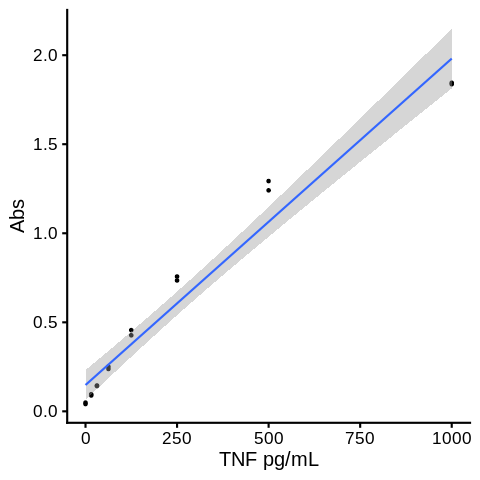

In [ ]:
%%R
curve<-standardsL%>%ggplot(aes(Conc,Abs))+geom_point()+geom_smooth(method="lm")+theme_cowplot(font_size=20, line_size = 1)+xlab(c("TNF pg/mL"))
curve
#Plot the curve

In [ ]:
%%R
meanStandards<-standardsL%>%group_by(Conc)%>%summarise(meanAbs=mean(Abs))
meanStandards

#Make a summary for the two replicates

# A tibble: 8 × 2
    Conc meanAbs
   <dbl>   <dbl>
1    0    0.045 
2   15.6  0.0925
3   31.2  0.144 
4   62.5  0.244 
5  125    0.442 
6  250    0.746 
7  500    1.27  
8 1000    1.84  


In [ ]:
%%R
calc<-lm(meanAbs~Conc, data=meanStandards)

#Perform the regression, here we assume the data is linear

In [ ]:
%%R
summary(calc)
#Show the regression analysis


Call:
lm(formula = meanAbs ~ Conc, data = meanStandards)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13991 -0.08883 -0.03989  0.08326  0.20256 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.147970   0.059199    2.50   0.0466 *  
Conc        0.001833   0.000145   12.64  1.5e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.133 on 6 degrees of freedom
Multiple R-squared:  0.9638,	Adjusted R-squared:  0.9578 
F-statistic: 159.8 on 1 and 6 DF,  p-value: 1.502e-05



`geom_smooth()` using formula = 'y ~ x'


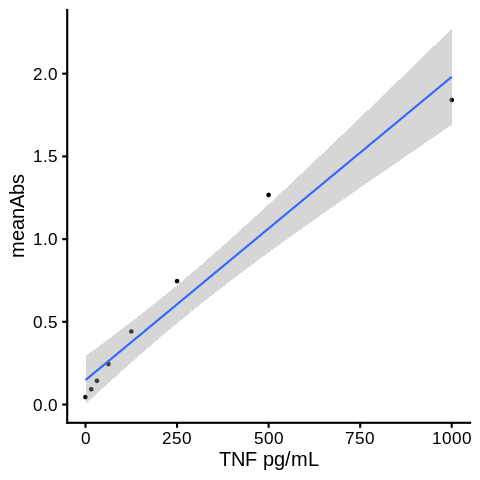

In [ ]:
%%R
curve<-meanStandards%>%ggplot(aes(Conc,meanAbs))+geom_point()+geom_smooth(method="lm")+theme_cowplot(font_size=20, line_size = 1)+xlab(c("TNF pg/mL"))
curve

#Curve for the average data

#Creating metadata from the plate plan

In [ ]:
%%R
plate_plan_samples<-read_excel("TNF_ELISA.xlsx", range = "D12:I18")

#Using the same file, we have now imported the metadata for the plate, the sample information

In [ ]:
%%R
plate_plan_samples$Row<-c("A","B","C","D","E","F")

#So we can keep track of everything, we have created a row identification, using A-F

In [ ]:
%%R
plate_plan_samples

#View the plan

# A tibble: 6 × 7
  Exp_1_r1 Exp_1_r2 Exp_2_r1 Exp_2_r2 Exp_3_r1 Exp_3_r2 Row  
  <chr>    <chr>    <chr>    <chr>    <chr>    <chr>    <chr>
1 24hr M0  24hr M0  24hr M0  24hr M0  24hr M0  24hr M0  A    
2 24hr M2  24hr M2  24hr M2  24hr M2  24hr M2  24hr M2  B    
3 24hr M1  24hr M1  24hr M1  24hr M1  24hr M1  24hr M1  C    
4 48hr M0  48hr M0  48hr M0  48hr M0  48hr M0  48hr M0  D    
5 48hr M2  48hr M2  48hr M2  48hr M2  48hr M2  48hr M2  E    
6 48hr M1  48hr M1  48hr M1  48hr M1  48hr M1  48hr M1  F    


In [ ]:
%%R
colnames(plate_plan_samples)

#View column names

[1] "Exp_1_r1" "Exp_1_r2" "Exp_2_r1" "Exp_2_r2" "Exp_3_r1" "Exp_3_r2" "Row"     


In [ ]:
%%R
samples<-pivot_longer(plate_plan_samples, starts_with("Exp"), names_to = "Replicate", values_to = "Condition")

#To turn our metadata into an easy format, we are going to collect each column and turn this into a table of replicate and condition

In [ ]:
%%R
samples

#Print the samples

# A tibble: 36 × 3
   Row   Replicate Condition
   <chr> <chr>     <chr>    
 1 A     Exp_1_r1  24hr M0  
 2 A     Exp_1_r2  24hr M0  
 3 A     Exp_2_r1  24hr M0  
 4 A     Exp_2_r2  24hr M0  
 5 A     Exp_3_r1  24hr M0  
 6 A     Exp_3_r2  24hr M0  
 7 B     Exp_1_r1  24hr M2  
 8 B     Exp_1_r2  24hr M2  
 9 B     Exp_2_r1  24hr M2  
10 B     Exp_2_r2  24hr M2  
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
%%R
sample_data<-read_excel("TNF_ELISA.xlsx", range = "D1:I7")

#Import the absorbance data

In [ ]:
%%R
sample_data$Row<-c("A","B","C","D","E","F")

#Set a column called Row, to match the ELISA plate

In [ ]:
%%R
colnames(sample_data)<-colnames(plate_plan_samples)

#Set the column names to match between the data (samples) and the plate plan

In [ ]:
%%R
sample_data

#Check the format

# A tibble: 6 × 7
  Exp_1_r1 Exp_1_r2 Exp_2_r1 Exp_2_r2 Exp_3_r1 Exp_3_r2 Row  
     <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl> <chr>
1    0.054    0.052    0.061    0.059   0.0565   0.0543 A    
2    0.053    0.055    0.07     0.061   0.0588   0.0585 B    
3    1.83     1.84     1.98     1.98    1.91     1.90   C    
4    0.074    0.075    0.065    0.063   0.65     0.067  D    
5    0.069    0.071    0.063    0.062   0.65     0.066  E    
6    1.39     1.39     1.57     1.56    1.49     1.49   F    


In [ ]:
%%R
samples_dataL<-pivot_longer(sample_data, starts_with("Exp"), names_to = "Replicate", values_to = "Abs")

#The data is in a wide format, to convert to long, we will collect each column. We need to make sure that our row
#value is correct, it is a good idea to double check at this point.

In [ ]:
%%R
samples_dataL

#Print the new reshaped data

# A tibble: 36 × 3
   Row   Replicate    Abs
   <chr> <chr>      <dbl>
 1 A     Exp_1_r1  0.054 
 2 A     Exp_1_r2  0.052 
 3 A     Exp_2_r1  0.061 
 4 A     Exp_2_r2  0.059 
 5 A     Exp_3_r1  0.0565
 6 A     Exp_3_r2  0.0543
 7 B     Exp_1_r1  0.053 
 8 B     Exp_1_r2  0.055 
 9 B     Exp_2_r1  0.07  
10 B     Exp_2_r2  0.061 
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
%%R
data<-samples%>%left_join(samples_dataL, by = c("Row","Replicate"))

#Here we join this data with the metadata, using Row and Replicate to identify the data

In [ ]:
%%R
data

#Here is our final dataframe of metadata and absorbance values

# A tibble: 36 × 4
   Row   Replicate Condition    Abs
   <chr> <chr>     <chr>      <dbl>
 1 A     Exp_1_r1  24hr M0   0.054 
 2 A     Exp_1_r2  24hr M0   0.052 
 3 A     Exp_2_r1  24hr M0   0.061 
 4 A     Exp_2_r2  24hr M0   0.059 
 5 A     Exp_3_r1  24hr M0   0.0565
 6 A     Exp_3_r2  24hr M0   0.0543
 7 B     Exp_1_r1  24hr M2   0.053 
 8 B     Exp_1_r2  24hr M2   0.055 
 9 B     Exp_2_r1  24hr M2   0.07  
10 B     Exp_2_r2  24hr M2   0.061 
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


#Calculating the unknowns

In [ ]:
%%R
data<-data%>%mutate(Concentration=(Abs-0.147970 )/0.001833)

#Assuming our data is linear, convert the Abs values to concentration

In [ ]:
%%R
data

#We have a column called condition that we would need to split into time and cell type

# A tibble: 36 × 5
   Row   Replicate Condition    Abs Concentration
   <chr> <chr>     <chr>      <dbl>         <dbl>
 1 A     Exp_1_r1  24hr M0   0.054          -51.3
 2 A     Exp_1_r2  24hr M0   0.052          -52.4
 3 A     Exp_2_r1  24hr M0   0.061          -47.4
 4 A     Exp_2_r2  24hr M0   0.059          -48.5
 5 A     Exp_3_r1  24hr M0   0.0565         -49.9
 6 A     Exp_3_r2  24hr M0   0.0543         -51.1
 7 B     Exp_1_r1  24hr M2   0.053          -51.8
 8 B     Exp_1_r2  24hr M2   0.055          -50.7
 9 B     Exp_2_r1  24hr M2   0.07           -42.5
10 B     Exp_2_r2  24hr M2   0.061          -47.4
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
%%R
data<-data%>%separate(Condition, into = c("Time", "Cell"), sep = " ")
data

#Seperate takes condition and splits this into two columns Time and Cell, in the condition cell
#the values are seperated by a space, the argument sep=" " defines a space.

# A tibble: 36 × 6
   Row   Replicate Time  Cell     Abs Concentration
   <chr> <chr>     <chr> <chr>  <dbl>         <dbl>
 1 A     Exp_1_r1  24hr  M0    0.054          -51.3
 2 A     Exp_1_r2  24hr  M0    0.052          -52.4
 3 A     Exp_2_r1  24hr  M0    0.061          -47.4
 4 A     Exp_2_r2  24hr  M0    0.059          -48.5
 5 A     Exp_3_r1  24hr  M0    0.0565         -49.9
 6 A     Exp_3_r2  24hr  M0    0.0543         -51.1
 7 B     Exp_1_r1  24hr  M2    0.053          -51.8
 8 B     Exp_1_r2  24hr  M2    0.055          -50.7
 9 B     Exp_2_r1  24hr  M2    0.07           -42.5
10 B     Exp_2_r2  24hr  M2    0.061          -47.4
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
%%R
data <- data %>%
  mutate(final_conc = pmax(Concentration, 0))

#We need to remove the minus values
#Using mutate, we can replace them with a zero or any value

In [ ]:
%%R
data

# A tibble: 36 × 7
   Row   Replicate Time  Cell     Abs Concentration final_conc
   <chr> <chr>     <chr> <chr>  <dbl>         <dbl>      <dbl>
 1 A     Exp_1_r1  24hr  M0    0.054          -51.3          0
 2 A     Exp_1_r2  24hr  M0    0.052          -52.4          0
 3 A     Exp_2_r1  24hr  M0    0.061          -47.4          0
 4 A     Exp_2_r2  24hr  M0    0.059          -48.5          0
 5 A     Exp_3_r1  24hr  M0    0.0565         -49.9          0
 6 A     Exp_3_r2  24hr  M0    0.0543         -51.1          0
 7 B     Exp_1_r1  24hr  M2    0.053          -51.8          0
 8 B     Exp_1_r2  24hr  M2    0.055          -50.7          0
 9 B     Exp_2_r1  24hr  M2    0.07           -42.5          0
10 B     Exp_2_r2  24hr  M2    0.061          -47.4          0
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


# Plotting the results

In [ ]:
%%R
sumdata<-data%>%group_by(Time ,Cell)%>%summarise(meanTNF=mean(final_conc), sdTNF=sd(final_conc))
sumdata

#Make a summary of the data

`summarise()` has grouped output by 'Time'. You can override using the
`.groups` argument.
# A tibble: 6 × 4
# Groups:   Time [2]
  Time  Cell  meanTNF sdTNF
  <chr> <chr>   <dbl> <dbl>
1 24hr  M0        0     0  
2 24hr  M1      960.   34.9
3 24hr  M2        0     0  
4 48hr  M0       45.6 112. 
5 48hr  M1      727.   42.4
6 48hr  M2       45.6 112. 


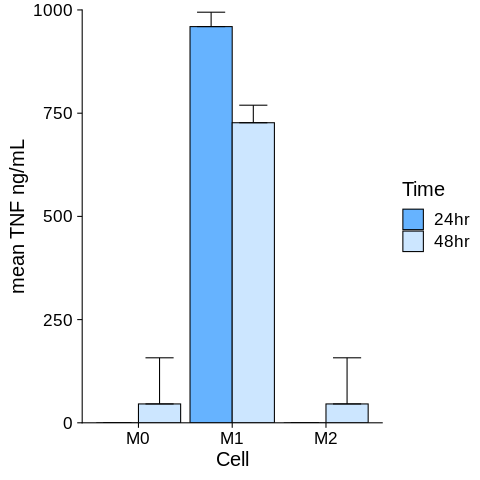

In [ ]:
%%R
p<-sumdata%>%ggplot(aes(Cell, meanTNF, fill=Time))+geom_bar(stat="identity", position = position_dodge(),colour="black")+
geom_errorbar(aes(ymin = meanTNF, ymax = meanTNF+sdTNF),position=position_dodge(.9), width=0.6)+
scale_y_continuous(limits = c(0, 1000), expand = c(0, 0))+
scale_fill_manual(values=c('#66b3ff','#cce6ff'))+theme_cowplot(font_size = 20)+
ylab("mean TNF ng/mL")
p

In [ ]:
%%R
filtered_data<-data%>%filter(Cell=="M1")

#Filter one cell type M1

In [ ]:
%%R
filtered_data$Time<-factor(filtered_data$Time)

#Turn time into a factor

In [ ]:
%%R
t.test(final_conc~Time, data=filtered_data)


	Welch Two Sample t-test

data:  final_conc by Time
t = 10.393, df = 9.6413, p-value = 1.501e-06
alternative hypothesis: true difference in means between group 24hr and group 48hr is not equal to 0
95 percent confidence interval:
 182.6843 283.0368
sample estimates:
mean in group 24hr mean in group 48hr 
          959.7363           726.8758 



In [ ]:
%%R
filtered_data

# A tibble: 18 × 7
   Row   Replicate Time  Cell    Abs Concentration final_conc
   <chr> <chr>     <fct> <chr> <dbl>         <dbl>      <dbl>
 1 D     Exp_1_r1  48hr  M0    0.074         -40.4         0 
 2 D     Exp_1_r2  48hr  M0    0.075         -39.8         0 
 3 D     Exp_2_r1  48hr  M0    0.065         -45.3         0 
 4 D     Exp_2_r2  48hr  M0    0.063         -46.4         0 
 5 D     Exp_3_r1  48hr  M0    0.65          274.        274.
 6 D     Exp_3_r2  48hr  M0    0.067         -44.2         0 
 7 E     Exp_1_r1  48hr  M2    0.069         -43.1         0 
 8 E     Exp_1_r2  48hr  M2    0.071         -42.0         0 
 9 E     Exp_2_r1  48hr  M2    0.063         -46.4         0 
10 E     Exp_2_r2  48hr  M2    0.062         -46.9         0 
11 E     Exp_3_r1  48hr  M2    0.65          274.        274.
12 E     Exp_3_r2  48hr  M2    0.066         -44.7         0 
13 F     Exp_1_r1  48hr  M1    1.39          679.        679.
14 F     Exp_1_r2  48hr  M1    1.39          677.  

#One-way ANOVA with post hoc test

In [ ]:
%%R
filtered_data<-filter(data, Time =="48hr")

#Filter one time point

In [ ]:
%%R
library(broom)

In [ ]:
%%R
data.aov <- aov(final_conc~ Cell, data = data)
# Summary of the analysis
tidy(data.aov)

#One-way analysis, we have 3 cell types, here we are analysing the effect of Cell on TNF levels

# A tibble: 2 × 6
  term         df    sumsq   meansq statistic   p.value
  <chr>     <dbl>    <dbl>    <dbl>     <dbl>     <dbl>
1 Cell          2 5385530. 2692765.      282.  1.80e-21
2 Residuals    33  315256.    9553.       NA  NA       


In [ ]:
%%R
pht<-data.frame(tidy(TukeyHSD(data.aov, which = "Cell")))
pht

#The aov results above show that there is a significant effect of cell on TNF.
#Where is the difference? To determine the effect, we run a post hoc test to determine
#where the difference is, here we are using TukeyHSD, the results can also be stored in a file.

  term contrast null.value      estimate   conf.low  conf.high  adj.p.value
1 Cell    M1-M0          0  8.204824e+02  722.57007  918.39465 5.861978e-14
2 Cell    M2-M0          0  3.552714e-15  -97.91229   97.91229 1.000000e+00
3 Cell    M2-M1          0 -8.204824e+02 -918.39465 -722.57007 5.861978e-14


#Two-way ANOVA

In [ ]:
%%R
data.aov2 <- aov(final_conc ~ Cell + Time, data = data)
tidy(data.aov2)

#For a two way ANOVA, we are looking at two factors, Time and Cell. In the model above
#we are looking at an additive model Cell+Time

# A tibble: 3 × 6
  term         df    sumsq   meansq statistic   p.value
  <chr>     <dbl>    <dbl>    <dbl>     <dbl>     <dbl>
1 Cell          2 5385530. 2692765.    292.    2.83e-21
2 Time          1   20041.   20041.      2.17  1.50e- 1
3 Residuals    32  295215.    9225.     NA    NA       


In [ ]:
%%R
data.aov2 <- aov(final_conc ~ Cell * Time, data = data)
tidy(data.aov2)

#In this model we are looking for an interaction between Cell and Time , does the effect of Cell on final_conc depends on Time

# A tibble: 4 × 6
  term         df    sumsq   meansq statistic   p.value
  <chr>     <dbl>    <dbl>    <dbl>     <dbl>     <dbl>
1 Cell          2 5385530. 2692765.    577.    1.15e-24
2 Time          1   20041.   20041.      4.29  4.70e- 2
3 Cell:Time     2  155133.   77567.     16.6   1.39e- 5
4 Residuals    30  140082.    4669.     NA    NA       


In [ ]:
install.packages("dr4pl")
#More complex cure analysis, there are many ways to analyse a ELISA standard curve, sometimes a four parameter
#curve will give more accurate results.

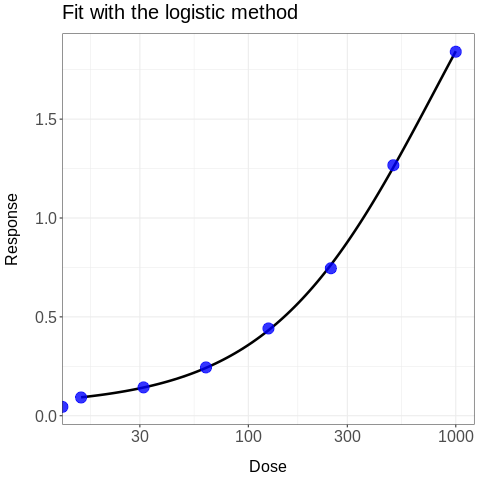

In [ ]:
%%R
dr4pl.logistic.5 <- dr4pl(meanAbs~Conc, data = meanStandards, method.init = "logistic")
plot(dr4pl.logistic.5, text.title = "Fit with the logistic method")